![pic](https://i.pinimg.com/736x/d6/f3/f4/d6f3f4f44f5c07ccf75438640b4979e6.jpg)

# Deep Learning using PyTorch 

> https://github.com/Rudra-G-23/deep-learning-using-pytorch

|No | Topic | My Notebook | Lectures |
|---| -------- | ----------- | ------------ |
| 01 | PyTorch for Beginners | [🗺️](https://github.com/Rudra-G-23/AI-Engineering-Resources/tree/main/PyTorch) | [🧑‍🏫](https://youtu.be/QZsguRbcOBM?si=xS9S0YBpN4AtVNiA) |
| 02 | Tensor in PyTorch | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/tensors-in-pytorch/) | [🧑‍🏫](https://youtu.be/mDsFsnw3SK4?si=7UXsevk1lyPfcM9B)|
| 03 |PyTorch Autograd | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/pytorch-autograd/) | [🧑‍🏫](https://youtu.be/BECZ0UB5AR0?si=fnEYItyybv5nky2y) |
| 04 |PyTorch Training Pipeline | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/simple-pytorch-training-pipeline/) | [🧑‍🏫](https://youtu.be/MKxEbbKpL5Q?si=xrUovfzRyXfvmM8E) |
| 05 | PyTorch NN Module | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/simple-pytorch-nn-module?scriptVersionId=289809301)[📒](https://www.kaggle.com/code/rudraprasadbhuyan/pytorch-training-pipeline-using-nn-module?scriptVersionId=289814480) | [🧑‍🏫](https://youtu.be/CAgWNxlmYsc?si=INKJ8VcdQgcYwxAe) |
|06 |Dataset & DataLoader Class | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/dataset-and-dataloader-class-in-pytorch)[📒](https://www.kaggle.com/code/rudraprasadbhuyan/pytorch-training-pipeline-using-dataset-dataloader/) | [🧑‍🏫](https://youtu.be/RH6DeE3bY6I?si=ac6IsukunPNN_dC9) |
| 07 | ANN using PyTorch | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/ann-fashion-mnist-pytorch) | [🧑‍🏫](https://youtu.be/6EJaHBJhwDs?si=77w3QVjd2qRTgd3I) |
| 08 | Trining on GPU | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/ann-fashion-mnist-pytorch-training-on-gpu/) | [🧑‍🏫](https://youtu.be/CabHrf9eOVs?si=1jETgquzn5gl8Srs) |
| 09 | Optimizing the Neural Network | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/ann-fashion-mnist-pytorch-gpu-optimized/) | [🧑‍🏫](https://youtu.be/7smLlJ8oj4o?si=j6N8JIl1_RHwti-2) |
| 10 | Optuna X PyTorch | [📒](https://www.kaggle.com/code/rudraprasadbhuyan/ann-fashion-mnist-pytorch-gpu-optimized-optuna/) | [🧑‍🏫](https://youtu.be/Y3s-wBBLj_o?si=sZVcZBWMyTZbSGM2) |

In this notebook, learn how to used optuna

- Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [41]:
!pip install optuna 

In [42]:
import numpy as np
import pandas as pd

import optuna

import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Dataset

In [44]:
path = "/kaggle/input/fashionmnist/fashion-mnist_train.csv"

In [45]:
torch.manual_seed(42)

In [46]:
df = pd.read_csv(path)
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


# Sample Images

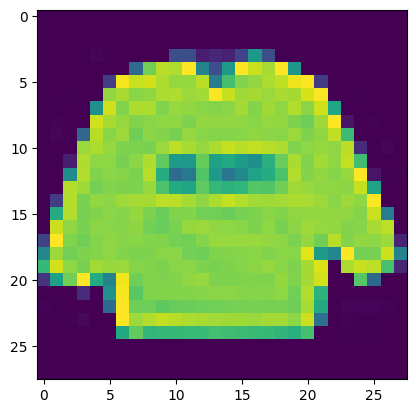

In [47]:
sample_image = df.iloc[0, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(sample_image)
plt.show()

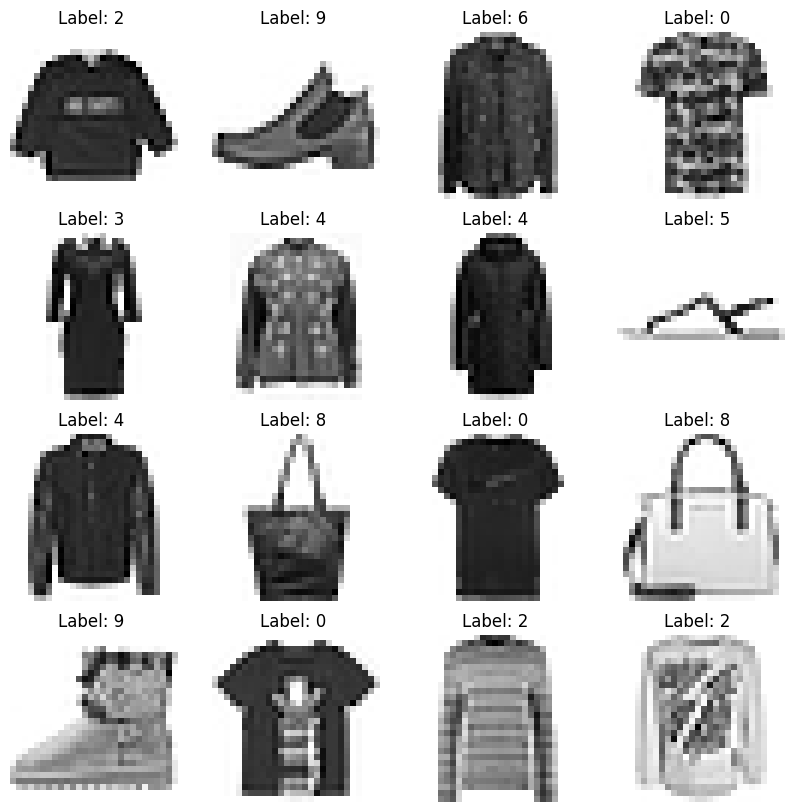

In [48]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap=plt.cm.binary )
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i, 0]} ")

plt.show()

# Train Test Split

In [49]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

print(f"{X.shape}, {y.shape} ")

(60000, 784), (60000,) 


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [51]:
# scaling the features
X_train = X_train / 255.0
X_test  = X_test / 255.0

# Custom Dataset

In [52]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [53]:
# create train dataset object
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define the NN Class

In [54]:
class SimpleNN(nn.Module):
    
    def __init__(self, input_dim, output_dim, num_hidden_layer, neurons_per_layer, dropout_rate):
        
        super().__init__()
        
        layers = []
        
        for i in range(num_hidden_layer):
            
            layers.append(nn.Linear(input_dim, neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            layers_dim = neurons_per_layer
            
        layers.append(nn.Linear(neurons_per_layer, output_dim))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
            

In [55]:
class SimpleNN(nn.Module):

    def __init__(self, input_dim, output_dim, num_hidden_layer, neurons_per_layer, dropout_rate):
        super().__init__()

        layers = []
        in_features = input_dim

        for _ in range(num_hidden_layer):
            layers.append(nn.Linear(in_features, neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            in_features = neurons_per_layer

        layers.append(nn.Linear(in_features, output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


# Objective Function

> Objective Function

    - hyper parameter values for tuning
    - model input and outputs
    - optimizer selection
    - training loop
      - move data to gpu
      - forward pass
      - calculate the loss
      - back pass
      - update grads

In [56]:
def objective(trial):

    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
    neurons_per_layer = trial.suggest_int("neurons_per_layers", 8, 128, step=8)
    epochs = trial.suggest_int("epochs", 10, 60, step=10)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    weight_decay = trial.suggest_float("weight_decay", 1e-8, 1e-2, log=True)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = SimpleNN(
        input_dim=784,
        output_dim=10,
        num_hidden_layer=num_hidden_layers,
        neurons_per_layer=neurons_per_layer,
        dropout_rate=dropout_rate
    ).to(device)

    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Training
    model.train()
    for epoch in range(epochs):
        for batch_features, batch_labels in train_loader:
            batch_features = batch_features.to(device)
            batch_labels = batch_labels.to(device)

            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            batch_features = batch_features.to(device)
            batch_labels = batch_labels.to(device)

            outputs = model(batch_features)
            _, predicted = torch.max(outputs, 1)

            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    accuracy = correct / total
    return accuracy

# Study

In [57]:
study = optuna.create_study(direction='maximize')

[I 2026-01-03 19:01:48,377] A new study created in memory with name: no-name-b5fbb68d-2074-4912-ab3c-8e23e210c676


In [58]:
# Just because we are learning, the trials are fewer 
study.optimize(objective, n_trials=5)

[I 2026-01-03 19:02:33,809] Trial 0 finished with value: 0.6484166666666666 and parameters: {'num_hidden_layers': 5, 'neurons_per_layers': 56, 'epochs': 10, 'learning_rate': 0.00032472483904947517, 'dropout_rate': 0.30000000000000004, 'batch_size': 32, 'optimizer': 'SGD', 'weight_decay': 0.0001885084603673031}. Best is trial 0 with value: 0.6484166666666666.
[I 2026-01-03 19:06:46,592] Trial 1 finished with value: 0.8958333333333334 and parameters: {'num_hidden_layers': 4, 'neurons_per_layers': 104, 'epochs': 60, 'learning_rate': 0.0016826736062246026, 'dropout_rate': 0.1, 'batch_size': 32, 'optimizer': 'RMSprop', 'weight_decay': 1.2671830110109497e-08}. Best is trial 1 with value: 0.8958333333333334.
[I 2026-01-03 19:10:44,329] Trial 2 finished with value: 0.85025 and parameters: {'num_hidden_layers': 5, 'neurons_per_layers': 96, 'epochs': 50, 'learning_rate': 0.0006001036823967353, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'RMSprop', 'weight_decay': 0.007917215066967418}. B

In [59]:
study.best_value

0.8958333333333334

In [60]:
study.best_params

{'num_hidden_layers': 4,
 'neurons_per_layers': 104,
 'epochs': 60,
 'learning_rate': 0.0016826736062246026,
 'dropout_rate': 0.1,
 'batch_size': 32,
 'optimizer': 'RMSprop',
 'weight_decay': 1.2671830110109497e-08}

**Training On GPU Notebook:**
- If we notice the training dataset, it gives 71%
- But the test dataset gives the 69%
- 2% difference
- Link of the notebook: https://www.kaggle.com/code/rudraprasadbhuyan/ann-fashion-mnist-pytorch-training-on-gpu/

**GPU + Impovement Notebook:**
- Training Dataset performance: 93%
- Testing Dataset Performance: 88%
- Difference 5%
- But we improve our model performance
- If you notice, we chose the ANN, and this is an image problem
- So if we used the CNN then it definitely improved
- https://www.kaggle.com/code/rudraprasadbhuyan/ann-fashion-mnist-pytorch-gpu-optimized/

**Now Oputna**
- Now we are learning, so we give fewer trials to the optuna
- We improved the 1% -> 89% in just 5 trials
- What happens if we do for the 100 with early stopping?
- May we get maximum accuracy 😁
- Now Sleep 